In [22]:
import spikeinterface.extractors as se
import spikeinterface.widgets as sw
import spikeinterface.core as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate toy dataset

In [16]:
recording, ground_truth = se.toy_example(
    duration=3,
    num_channels=1024,
    num_units=20,
    sampling_frequency=15000,
    num_segments=1,
    contact_spacing_um=16.0,
)
print(recording)

InjectTemplatesRecording: 1024 channels - 15.0kHz - 1 segments - 45,000 samples - 3.00s 
                          float32 dtype - 175.78 MiB


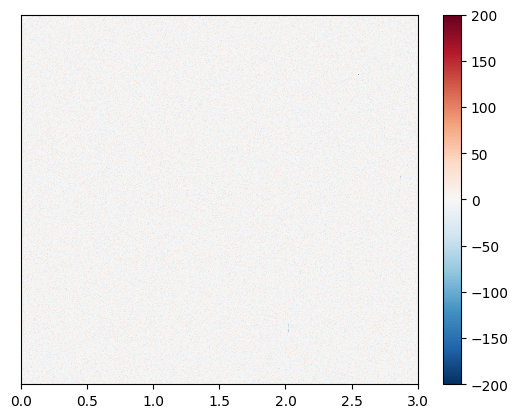

In [17]:
_ = sw.plot_traces(recording, time_range=(0, 3))
plt.show()

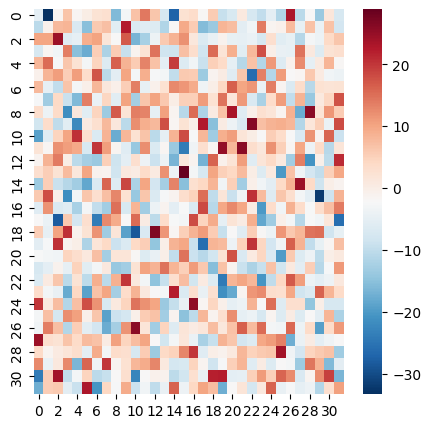

In [18]:
_, ax = plt.subplots(figsize=(5, 5))

start = 30000
end = 30100
traces_raw = recording.get_traces(
    start_frame=start, 
    end_frame=end
)

traces = np.reshape(traces_raw, (100, 32, 32))
sns.heatmap(traces[50, :, :], cmap='RdBu_r')
plt.show()

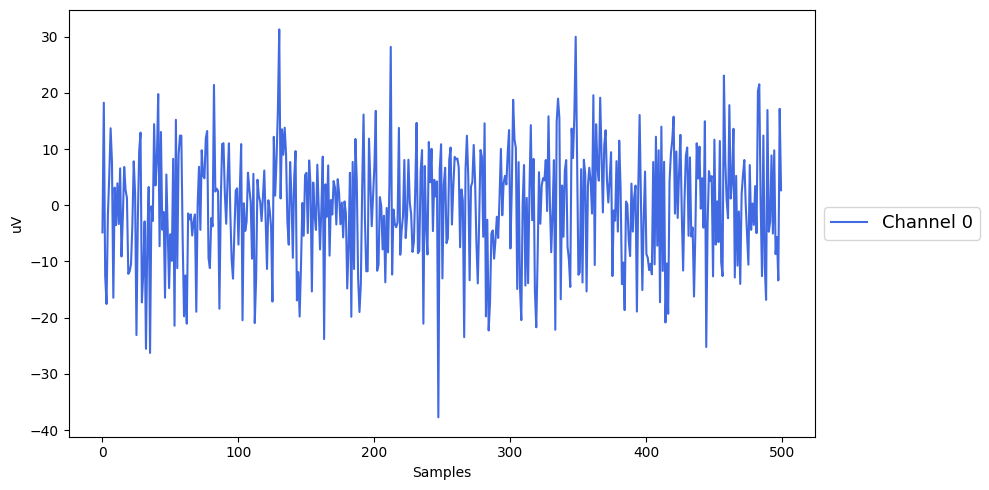

In [19]:
_, ax = plt.subplots(figsize=(10, 5))

start = 30000
end = 30500
traces = recording.get_traces( 
    start_frame=start, 
    end_frame=end
)

n_channel = 0
ax.plot(traces[:, n_channel], label=f'Channel {n_channel}', c='royalblue')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)

ax.set_xlabel('Samples')
ax.set_ylabel('uV')

plt.tight_layout()
plt.show()

# Sorters

In [10]:
from spikesorting.utils import get_sorters, run_sorters

In [11]:
sorters = get_sorters()

Parameters for herdingspikes:
Herding Spikes is a density-based spike sorter designed for high-density retinal recordings.
    It uses both PCA features and an estimate of the spike location to cluster different units.
    For more information see https://doi.org/10.1016/j.jneumeth.2016.06.006
{'clustering_bandwidth': 'Meanshift bandwidth, average spatial extent of spike clusters (um)', 'clustering_alpha': 'Scalar for the waveform PC features when clustering.', 'clustering_n_jobs': 'Number of cores to use for clustering.', 'clustering_bin_seeding': 'Enable clustering bin seeding.', 'clustering_min_bin_freq': 'Minimum spikes per bin for bin seeding.', 'clustering_subset': 'Number of spikes used to build clusters. All by default.', 'left_cutout_time': 'Cutout size before peak (ms).', 'right_cutout_time': 'Cutout size after peak (ms).', 'detect_threshold': 'Detection threshold', 'probe_masked_channels': 'Masked channels', 'probe_inner_radius': 'Radius of area around probe channel for loca

## Spyking Circus 2

In [12]:
import spikeinterface.sorters as ss

detection = {
    'peak_sign': 'neg', 'detect_threshold': 8
}
sorter = 'spykingcircus2'
ss.run_sorter(
    sorter_name=sorter,
    recording=recording,
    output_folder=f"results/{sorter}",
    remove_existing_folder=True,
    detection=detection, # Custom sorter params
    verbose=True
)

detect peaks using locally_exclusive with n_jobs = 8 and chunk_size = 15000


detect peaks using locally_exclusive:   0%|          | 0/3 [00:00<?, ?it/s]

We found 72 peaks in total
We kept 72 peaks for clustering
Error running spykingcircus2


SpikeSortingError: Spike sorting error trace:
Traceback (most recent call last):
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sorters\basesorter.py", line 254, in run_from_folder
    SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sorters\internal\spyking_circus2.py", line 112, in _run_from_folder
    labels, peak_labels = find_cluster_from_peaks(
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sortingcomponents\clustering\main.py", line 42, in find_cluster_from_peaks
    labels, peak_labels = method_class.main_function(recording, peaks, params)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sortingcomponents\clustering\random_projections.py", line 119, in main_function
    x = scipy.signal.savgol_filter(x, node2.window_length, node2.order, axis=1)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\scipy\signal\_savitzky_golay.py", line 341, in savgol_filter
    coeffs = savgol_coeffs(window_length, polyorder, deriv=deriv, delta=delta)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\scipy\signal\_savitzky_golay.py", line 101, in savgol_coeffs
    raise ValueError("polyorder must be less than window_length.")
ValueError: polyorder must be less than window_length.

Spike sorting failed. You can inspect the runtime trace in C:\Users\roque\Desktop\These\Travail\Codes\SpikeSorting\results\spykingcircus2/spikeinterface_log.json.

## Herding Spikes

In [25]:
import spikeinterface.sorters as ss

sorter = 'herdingspikes'
ss.run_sorter(
    sorter_name=sorter,
    recording=recording,
    output_folder=f"results/{sorter}",
    remove_existing_folder=True,
    filter=False,
    verbose=True
)

# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 15000
# Localization On
# Number of recorded channels: 1024
# Analysing frames: 45000; Seconds: 3.0
# Frames before spike in cutout: 5
# Frames after spike in cutout: 27
# tcuts: 20 42
# tInc: 44938
# Detection completed, time taken: 0:00:01.761417
# Time per frame: 0:00:00.039143
# Time per sample: 0:00:00.000038
Loaded 76 spikes.
Fitting dimensionality reduction using all spikes...
...projecting...
...done
Clustering...
Clustering 76 spikes...
number of seeds: 0
seeds/job: 1
using 8 cpus
Error running herdingspikes


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


SpikeSortingError: Spike sorting error trace:
Traceback (most recent call last):
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sorters\basesorter.py", line 254, in run_from_folder
    SorterClass._run_from_folder(sorter_output_folder, sorter_params, verbose)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\sorters\external\herdingspikes.py", line 205, in _run_from_folder
    C.CombinedClustering(
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\herdingspikes\hs2.py", line 493, in CombinedClustering
    self.spikes["cl"] = clusterer.fit_predict(fourvec)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\sklearn\base.py", line 791, in fit_predict
    self.fit(X)
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\herdingspikes\clustering\mean_shift_.py", line 437, in fit
    mean_shift(X, bandwidth=self.bandwidth, seeds=self.seeds,
  File "C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\herdingspikes\clustering\mean_shift_.py", line 229, in mean_shift
    raise ValueError("No point was within bandwidth=%f of any seed."
ValueError: No point was within bandwidth=150.000000 of any seed. Try a different seeding strategy                          or increase the bandwidth.

Spike sorting failed. You can inspect the runtime trace in C:\Users\roque\Desktop\These\Travail\Codes\SpikeSorting\results\herdingspikes/spikeinterface_log.json.

## Tridesclous

In [20]:
import spikeinterface.sorters as ss

filtering = {'freq_min': 300.0, 'freq_max': 5000.0}
sorter = 'tridesclous2'
sorting_tridesclous = ss.run_sorter(
    sorter_name=sorter,
    recording=recording,
    output_folder=f"results/{sorter}",
    remove_existing_folder=True,
    filtering=filtering,
    verbose=True
)

detect peaks using locally_exclusive:   0%|          | 0/3 [00:00<?, ?it/s]

We found 93 peaks in total
We kept 93 peaks for clustering


extract waveforms shared_memory mono buffer:   0%|          | 0/3 [00:00<?, ?it/s]

pipeline:   0%|          | 0/3 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/37 [00:00<?, ?it/s]

find_merge_pairs with normalized_template_diff:   0%|          | 0/22 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/3 [00:00<?, ?it/s]

find spikes (tridesclous):   0%|          | 0/3 [00:00<?, ?it/s]

tridesclous2 run time 563.73s


# Validation

In [40]:
# Load sorting results

sorting_tridesclous = ss.read_sorter_folder(
    "results/tridesclous2", 
)
print(sorting_tridesclous_load)

NumpyFolderSorting: 0 units - 1 segments - 15.0kHz


In [43]:
sorting_tridesclous.to_numpy_sorting()

NumpyFolderSorting: 0 units - 1 segments - 15.0kHz

In [36]:
sorting_tridesclous_load.get_unit_ids()

array([], dtype=float64)

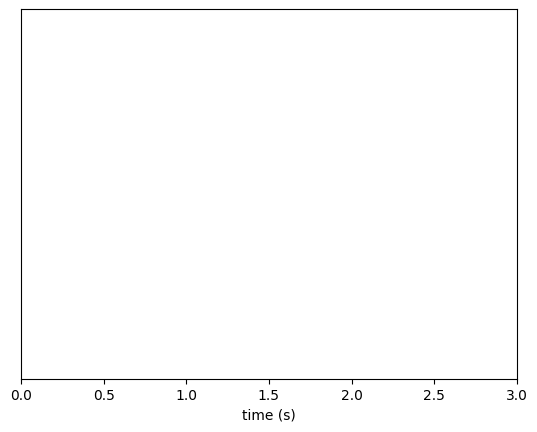

In [29]:
_ = sw.plot_rasters(
    sorting_tridesclous,
    time_range=(0, 3)
)